# **Working With Surprise Library** 

*Author: Kunal PATIL (AIS S20)*

Created with Google Colab

# Data Loading


Install Surprise Library

In [ ]:
pip install surprise

     |████████████████████████████████| 11.8MB 7.4MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618248 sha256=5f2d6dc8bdfac11acc12df63b3922579d2ba4194370bf9f7549fffe622048f1f
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


Install Necessary Libraries

In [ ]:
from surprise import KNNWithMeans, BaselineOnly
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd
import numpy as np
from tabulate import tabulate

Read the file

In [ ]:
df = pd.read_csv('ratings.csv')
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Create dataset with Reader

In [ ]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ratings.csv', reader)
data

Split data into train and test sets

In [ ]:
trainset, testset = train_test_split(data, test_size=.25)

# Model Pipelines

## User Based Model

### 1. Cosine Similarity

Train a user based model using cosine similarity

In [ ]:
sim_options = {
    "name": "cosine",
    "user_based": True
}

In [ ]:
algo = KNNWithMeans(sim_options=sim_options)

Fit the model

In [ ]:
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Make predictions with the model

In [ ]:
predictions = algo.test(testset)

Evaluate model with RMSE & MAE

In [ ]:
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.9093
MAE:  0.6924


0.6924355823073866

### 2. Pearson Correlation

Train a user based model using pearson correlation

In [ ]:
sim_options = {"name": "pearson_baseline",
               "shrinkage": 0,  # no shrinkage,
               "user_based": True, 
               }

In [ ]:
algo = KNNWithMeans(sim_options=sim_options)

Fit the model

In [ ]:
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Make predictions with the model

In [ ]:
predictions = algo.test(testset)

Evaluate model with RMSE & MAE

In [ ]:
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.9206
MAE:  0.6985


0.6984888004410842

## Item Based Model

### 1. Cosine Similarity

Train a item based model using cosine similarity

In [ ]:
sim_options = {
    "name": "cosine",
    "user_based": False, 
}

In [ ]:
algo = KNNWithMeans(sim_options=sim_options)

Fit the model

In [ ]:
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Make predictions with the model

In [ ]:
predictions = algo.test(testset)

Evaluate model with RMSE & MAE

In [ ]:
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.9141
MAE:  0.6962


0.6962109122568728

### 2. Pearson Correlation

Train a item based model using pearson correlation

In [ ]:
sim_options = {"name": "pearson_baseline",
               "shrinkage": 0,  # no shrinkage,
               "user_based": False, 
               }

In [ ]:
algo = KNNWithMeans(sim_options=sim_options)

Fit the model

In [ ]:
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


Make predictions with model

In [ ]:
predictions = algo.test(testset)

Evaluate model with RMSE & MAE

In [ ]:
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.9070
MAE:  0.6886


0.6886078835813548

## BaselineOnly Model

Train a item based baselineOnly model

In [ ]:
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }

In [ ]:
algo = BaselineOnly(bsl_options=bsl_options)

Fit the model

In [ ]:
algo.fit(trainset)

Estimating biases using als...


Make the predictions with model

In [ ]:
predictions = algo.test(testset)

Evaluate model with RMSE & MAE

In [ ]:
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.8767
MAE:  0.6720


0.6720280815997369

# Model BenchMarking

Here we will perform benchmarking for algorithm **KNNWithMeans** using cross-validate:


1.   User Based Model    
    * Cosine Similarity
    * Pearson Similarity    


2.   Item Based Model
    * Cosine Similarity
    * Pearson Similarity

3.   BaselineOnly Model


In [ ]:
algo_csn_user = KNNWithMeans(sim_options={"name": "cosine", "user_based": True})
algo_prsn_user = KNNWithMeans(sim_options={"name": "pearson_baseline", "shrinkage": 0, "user_based": True})
algo_csn_item = KNNWithMeans(sim_options={"name": "cosine", "user_based": False})
algo_prsn_item = KNNWithMeans(sim_options={"name": "pearson_baseline", "shrinkage": 0, "user_based": False})   
algo_bsln = BaselineOnly(bsl_options={'method': 'als', 'n_epochs': 5, 'reg_u': 12, 'reg_i': 5})

In [ ]:
dict_of_models = {'Cosine Similarity User Based Model': algo_csn_user, 
                  'Pearson Similarity User Based Model': algo_prsn_user, 
                  'Cosine Similarity Item Based Model': algo_csn_item, 
                  'Pearson Similarity Item Based Model': algo_prsn_item, 
                  'BaselineOnly Model': algo_bsln}

In [ ]:
table=[]
for name in dict_of_models.keys():  
  out = cross_validate(dict_of_models[name], data, ['rmse', 'mae'], cv=2, verbose=True)
  mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
  mean_mae = '{:.3f}'.format(np.mean(out['test_mae']))
  fit_time = '{:.3f}'.format(np.mean(out['fit_time']))  
  new_line = [name, mean_rmse, mean_mae, fit_time]
  print(tabulate([new_line], tablefmt="pipe"))
  table.append(new_line)   

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    0.9244  0.9169  0.9207  0.0038  
MAE (testset)     0.7060  0.7015  0.7038  0.0022  
Fit time          0.24    0.23    0.24    0.00    
Test time         3.15    3.25    3.20    0.05    
|:-----------------------------------|------:|------:|------:|
| Cosine Similarity User Based Model | 0.921 | 0.704 | 0.237 |
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    0.9447  0.9467  0.9457  0.0010  
MAE (

In [ ]:
header = ['Model Name',
          'RMSE',
          'MAE',
          'Fit Time'
          ]
df = pd.DataFrame(table)
df.columns = header
df

,Model Name,RMSE,MAE,Fit Time
0,Cosine Similarity User Based Model,0.921,0.704,0.237
1,Pearson Similarity User Based Model,0.946,0.723,0.525
2,Cosine Similarity Item Based Model,0.923,0.707,8.867
3,Pearson Similarity Item Based Model,0.928,0.707,5.479
4,BaselineOnly Model,0.877,0.676,0.159


## Comparative Graph 

### Graph for RMSE

In [ ]:
import plotly.express as px
fig = px.bar(df, x='Model Name', y='RMSE', range_y=[0.8,1], title="RMSE")
fig.show()

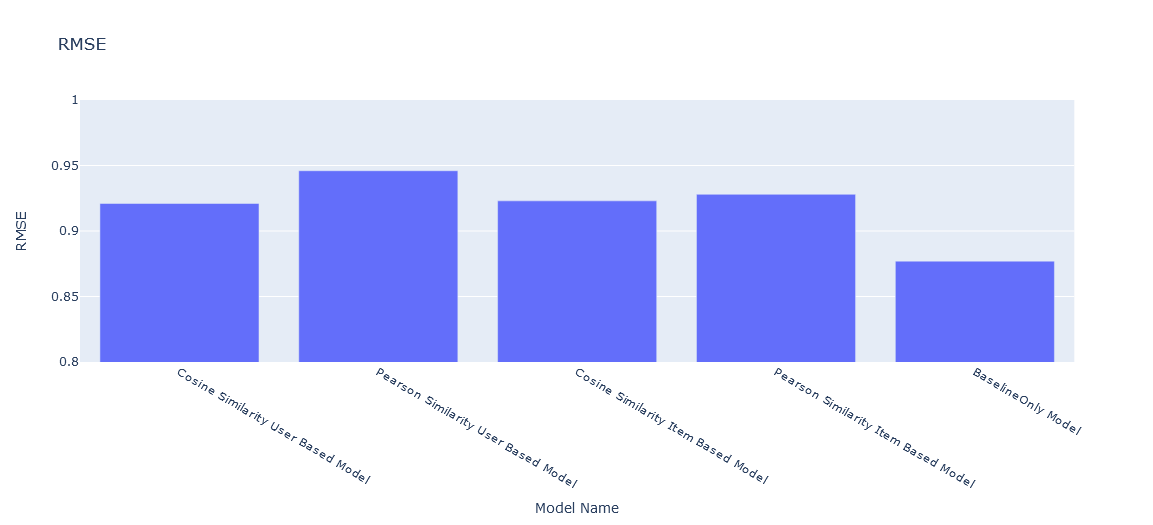

### Graph for MAE

In [ ]:
import plotly.express as px
fig = px.bar(df, x='Model Name', y='MAE', range_y=[0.6, 0.8], title="MAE")
fig.show()

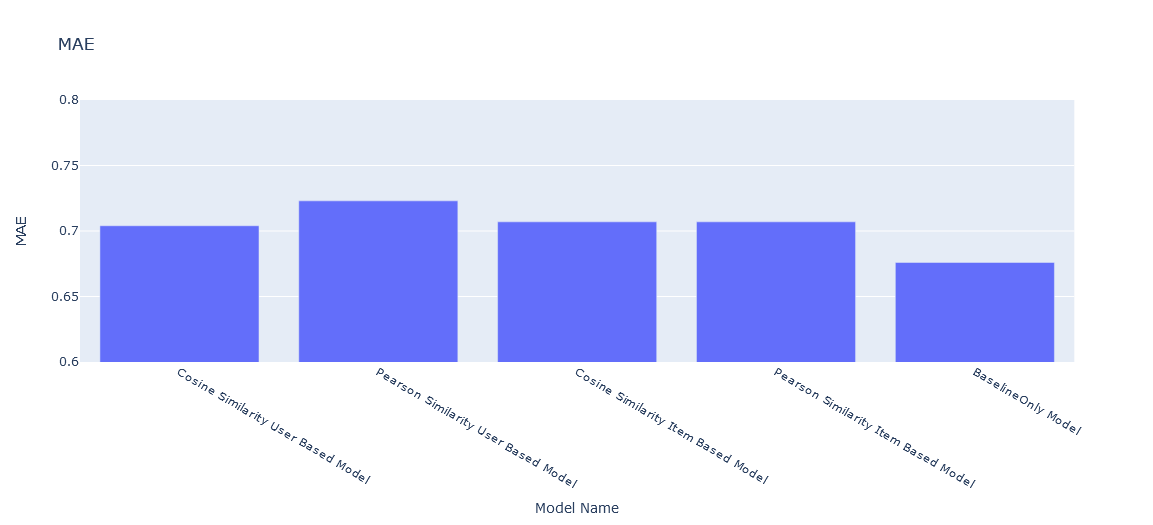

### Graph for Fit Time

In [ ]:
import plotly.express as px
fig = px.bar(df, x='Model Name', y='Fit Time', title="Fit Time")
fig.show()

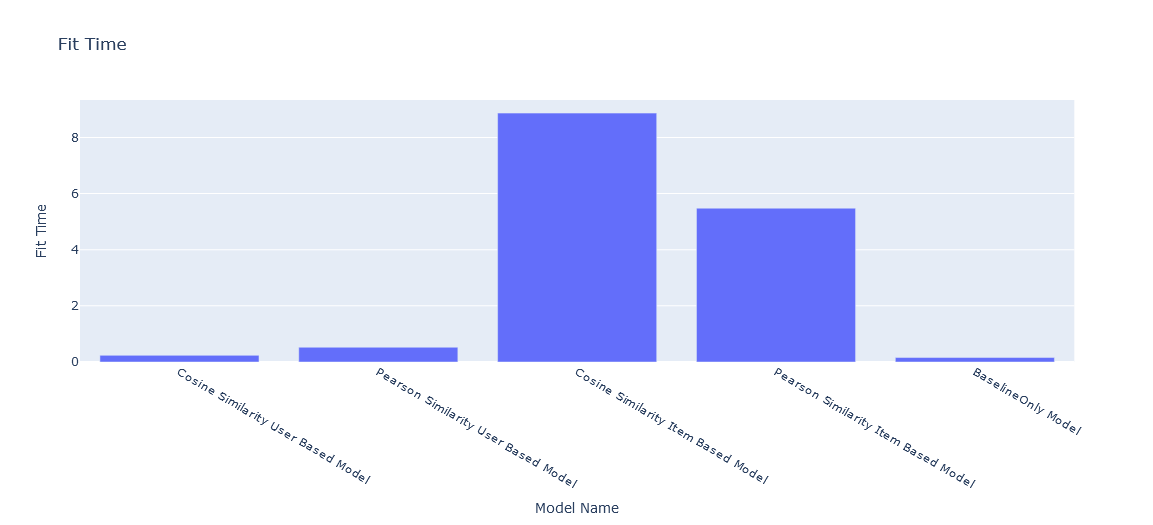